In [1]:
import pandas, sklearn
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
filename = "/Users/Yaxuan/Github/stat-215-final/CSpine/CSV datasets/analysisvariables.csv"
av_raw = pandas.read_csv(filename)
av_raw_wo2 = av_raw.loc[:,'SITE':'Clotheslining'].copy()

In [3]:
av_raw_wo2.head(10)

,SITE,CaseID,ControlType,StudySubjectID,AlteredMentalStatus,LOC,ambulatory,FocalNeuroFindings,PainNeck,PosMidNeckTenderness,...,Predisposed,HighriskDiving,HighriskFall,HighriskHanging,HighriskHitByCar,HighriskMVC,HighriskOtherMV,AxialLoadAnyDoc,axialloadtop,Clotheslining
0,1,110001,case,110001,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0
1,1,110002,case,110002,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,1,110003,case,110003,0.0,0.0,NaN,0.0,1.0,1.0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
3,1,110004,case,110004,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0
4,1,110005,case,110005,NaN,NaN,NaN,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
5,1,110006,case,110006,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0
6,1,110007,case,110007,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
7,1,110008,case,110008,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0
8,1,110009,case,110009,0.0,NaN,NaN,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
9,1,110010,case,110010,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0


In [4]:
an_names = ['AlteredMentalStatus', 'LOC', 'ambulatory', 'FocalNeuroFindings',
       'PainNeck', 'PosMidNeckTenderness', 'TenderNeck', 'Torticollis',
       'SubInj_Head', 'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk',
       'Predisposed', 'HighriskDiving', 'HighriskFall', 'HighriskHanging',
       'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc',
       'axialloadtop', 'Clotheslining']
av_raw_wo2[an_names].isna().sum(axis = 1)

0       0
1       0
2       1
3       0
4       4
       ..
3309    1
3310    0
3311    0
3312    3
3313    2
Length: 3314, dtype: int64

In [5]:
len(an_names)

22

In [9]:
av_raw_wo2['MissingRate'] = av_raw_wo2[an_names].isna().sum(axis = 1)/len(an_names)
ob_missing = pandas.DataFrame(av_raw_wo2.groupby('MissingRate').size()/av_raw_wo2.shape[0],
                              columns = ["Proportion"]).reset_index()
ob_missing['cul_prop'] = np.cumsum(ob_missing['Proportion'])
ob_missing['MissingCount'] = (ob_missing['MissingRate']*len(an_names)).astype(int)
ob_missing['Count'] = (av_raw_wo2.shape[0]*ob_missing['Proportion']).astype(int)

ob_missing

,MissingRate,Proportion,cul_prop,MissingCount,Count
0,0.000000,0.599276,0.599276,0,1986
1,0.045455,0.270368,0.869644,1,896
2,0.090909,0.082076,0.951720,2,272
3,0.136364,0.025649,0.977369,3,85
4,0.181818,0.010561,0.987930,4,35
5,0.227273,0.006337,0.994267,5,21
6,0.272727,0.002716,0.996982,6,9
7,0.318182,0.001509,0.998491,7,5
8,0.363636,0.000604,0.999095,8,2
9,0.409091,0.000604,0.999698,9,2


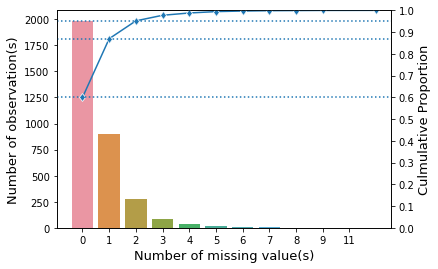

In [46]:
# plots
fig, ax1 = plt.subplots(figsize=(6,4))
# ax1.set_yscale('log')
sns.barplot(x = 'MissingCount', y = 'Count', data = ob_missing)
ax1.set_xlabel("Number of missing value(s)", fontsize = 13)
ax1.set_ylabel("Number of observation(s)", fontsize = 13)
ax2 = ax1.twinx()
ax2.set_ylim([0,1])
ax2.set_yticks(np.arange(0, 1.1, step=0.1))
graph = sns.lineplot(x = 'MissingCount', y = 'cul_prop', data = ob_missing, marker = "d")
ax2.set_ylabel("Culmulative Proportion", fontsize = 13)

graph.axhline(ob_missing['cul_prop'][0],linestyle = ":")
graph.axhline(ob_missing['cul_prop'][1],linestyle = ":")
graph.axhline(ob_missing['cul_prop'][2],linestyle = ":")

plt.savefig('figs/observation_missing.pdf')
plt.show()

In [20]:
av_na = av_raw_wo2.copy()
av_na.loc[:,'AlteredMentalStatus':'Clotheslining'] = av_raw_wo2.loc[:,'AlteredMentalStatus':'Clotheslining'].isna()

In [21]:
count_ob = pandas.DataFrame(av_na.groupby(["ControlType", "SITE"]).size(),
                            columns = ["Count"]).reset_index()  

In [22]:
count_ob['SITE'] = count_ob['SITE'].astype(object)

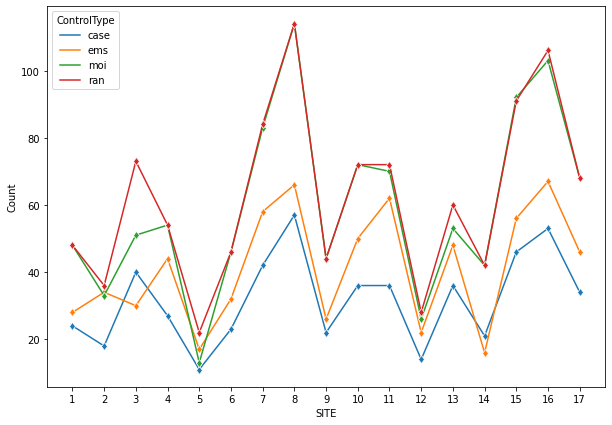

In [24]:
fig = plt.subplots(figsize=(10,7))
sns.lineplot(x='SITE', y= 'Count', data=count_ob, hue='ControlType', marker='d')
plt.xticks(np.arange(1, 18, step=1))
plt.show()

In [25]:
av_raw_wo2['MissingNum'] = av_raw_wo2.isna().sum(axis = 1)
av_missing_ob = av_raw_wo2[av_raw_wo2['MissingNum'] > 0]
missing_count = pandas.DataFrame(av_missing_ob.groupby(["ControlType", "SITE"]).size(),
                                 columns = ["Missing"]).reset_index()
missing_count["Rate"] = missing_count["Missing"]/count_ob['Count']

In [26]:
missing_site = pandas.DataFrame(av_missing_ob.groupby(["SITE"]).size(),
 columns = ["SITE_Missing"]).reset_index().sort_values(by = "SITE_Missing", ascending = False)

In [27]:
missing_site

,SITE,SITE_Missing
15,16,168
7,8,139
2,3,129
12,13,119
6,7,107
16,17,106
14,15,95
1,2,66
3,4,60
9,10,56


In [28]:
missing_count.head()

,ControlType,SITE,Missing,Rate
0,case,1,10,0.416667
1,case,2,8,0.444444
2,case,3,26,0.650000
3,case,4,5,0.185185
4,case,5,6,0.545455


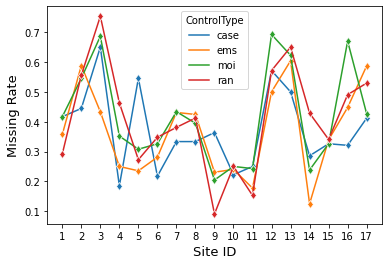

In [31]:
fig, ax1 = plt.subplots(figsize=(6,4))
sns.lineplot(x = 'SITE',y = 'Rate', data = missing_count, 
             hue='ControlType', marker='d', ax = ax1)
ax1.set_ylabel("Missing Rate", fontsize = 13)
ax1.set_xlabel("Site ID", fontsize = 13)
plt.xticks(np.arange(1, 18, step=1))
plt.savefig('figs/site_missing.pdf')
plt.show()

### Analysis Variables

In [173]:
av_delete = av_raw[av_raw_wo2['MissingNum'] <= 1]

In [174]:
av_raw.shape

(3314, 36)

In [175]:
av_delete.shape

(2882, 36)

In [176]:
av_missing = pandas.DataFrame(av_delete.isna().sum(),
                              columns = ["Missing"]).reset_index()
av_missing["rate"] = av_missing['Missing']/av_raw.shape[0]

In [177]:
# av_missing = av_missing.sort_values(by = 'rate')
av_missing = av_missing.sort_values(by = 'index')

In [178]:
av_missing

,index,Missing,rate
4,AlteredMentalStatus,45,0.013579
26,AlteredMentalStatus2,32,0.009656
23,AxialLoadAnyDoc,0,0.000000
1,CaseID,0,0.000000
25,Clotheslining,68,0.020519
2,ControlType,0,0.000000
7,FocalNeuroFindings,166,0.050091
27,FocalNeuroFindings2,163,0.049185
17,HighriskDiving,0,0.000000
18,HighriskFall,43,0.012975


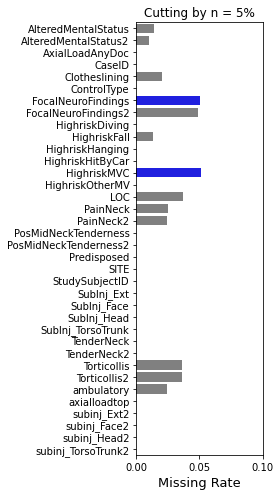

In [179]:
fig, ax1 = plt.subplots(figsize=(4,7))
clrs = ['grey' if (x < 0.05) else 'blue' for x in av_missing['rate'] ]
p = sns.barplot(y = 'index', x = 'rate', data = av_missing, 
                orient = 'h', palette=clrs).set(title = 'Cutting by n = 5%')
ax1.set_xlabel("Missing Rate", fontsize = 13)
ax1.set_ylabel("", fontsize = 13)
ax1.set_xticks([0,0.05,0.1])
fig.tight_layout()
plt.savefig('figs/an_missing_1.pdf')
plt.show()

In [162]:
av_raw.columns

Index(['SITE', 'CaseID', 'ControlType', 'StudySubjectID',
       'AlteredMentalStatus', 'LOC', 'ambulatory', 'FocalNeuroFindings',
       'PainNeck', 'PosMidNeckTenderness', 'TenderNeck', 'Torticollis',
       'SubInj_Head', 'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk',
       'Predisposed', 'HighriskDiving', 'HighriskFall', 'HighriskHanging',
       'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc',
       'axialloadtop', 'Clotheslining', 'AlteredMentalStatus2',
       'FocalNeuroFindings2', 'PainNeck2', 'PosMidNeckTenderness2',
       'TenderNeck2', 'Torticollis2', 'subinj_Head2', 'subinj_Face2',
       'subinj_Ext2', 'subinj_TorsoTrunk2'],
      dtype='object')

In [182]:
name_list = ['SITE', 'CaseID', 'ControlType',
    'AlteredMentalStatus','FocalNeuroFindings', 'PainNeck', 'PosMidNeckTenderness',
    'TenderNeck', 'Torticollis', 'subinj_Head', 'subinj_Face','subinj_Ext', 'subinj_TorsoTrunk',
    'AlteredMentalStatus2','FocalNeuroFindings2', 'PainNeck2', 'PosMidNeckTenderness2',
    'TenderNeck2', 'Torticollis2', 'subinj_Head2', 'subinj_Face2','subinj_Ext2', 'subinj_TorsoTrunk2']

In [176]:
av_adjusted_Alt = av_raw[['SITE', 'CaseID', 'ControlType',
    'AlteredMentalStatus', 'AlteredMentalStatus2']]
av_adjusted_Alt = av_adjusted_Alt[av_adjusted_Alt['AlteredMentalStatus2'].notna()]
av_adjusted_Alt = av_adjusted_Alt[av_adjusted_Alt['AlteredMentalStatus'] != av_adjusted_Alt['AlteredMentalStatus2']]

In [181]:
av_adjusted_Alt[av_adjusted_Alt['AlteredMentalStatus'].isna()]

,SITE,CaseID,ControlType,AlteredMentalStatus,AlteredMentalStatus2
896,7,710874,ems,NaN,1.0
916,7,710867,ems,NaN,1.0
1198,8,811153,ems,NaN,1.0
1288,8,811174,moi,NaN,1.0
1289,8,811142,moi,NaN,1.0
1444,8,811146,ran,NaN,1.0
1650,10,1011617,ems,NaN,1.0
1867,11,1111868,case,NaN,1.0
2111,12,1212088,ems,NaN,1.0
2207,13,1312181,ems,NaN,1.0
